# Introduction to basic charts

Make sure you first have matplotlib installed locally if you're running this notebook locally! If you have Python 3, run <strong>pip3 install matplotlib</strong> on the terminal before running the cells below.

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# importing any other necessary libraries below

import numpy as np
import pandas as pd

### Getting started and making basic charts with matplotlib

#### Step 1: Importing the dataset for your visualizations

Let's import the <a href="https://iranopendata.org/en/dataset/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202">crude birth rate, death rate and child mortality rate in selected countries of the world</a> from Iran Open Data, Iran's open data portal. This specific dataset has raw birth, death and child mortality rates from different countries in 2020. 

If you want to download the dataset directly, you can also access the dataset from <a href="https://raw.githubusercontent.com/kwonjs/datasets-to-use/main/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv">this github link.</a>

In [ ]:
# import the dataset below - make sure that if you're not importing from a URL that you first 
# upload the raw dataset to jupyter notebook

# import dataset as a 'dataframe' (df) to analyze in python
url = "https://raw.githubusercontent.com/kwonjs/datasets-to-use/main/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv"
df = pd.read_csv(url)

# to make sure the data is showing up properly for basic analysis and charting/graphing
# df.head(50) 

Let's take a look at this dataset. What <strong>variables/columns</strong> are we working with?

#### Step 2: Cleaning your dataset

Sometimes you will be lucky and have a clean dataset that you can immediately start visualizing. But more often than not, you will have to clean your dataset. Cleaning involves "fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset" (<a href="https://www.tableau.com/learn/articles/what-is-data-cleaning">Tableau</a>).

In [ ]:
# let's look at the first 10 rows of this dataset

df.head(10)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births
0,asia,17,7,27.0
1,"Azerbaijan, Republic of - Asia",14,6,11.0
2,Jordan - Asia,22,4,17.0
3,Armenia - Asia,12,9,6.0
4,Uzbekistan - Asia,23,5,11.0
5,Afghanistan - Asia,33,6,50.0
6,United Arab Emirates - Asia,11,1,6.0
7,Indonesia - Asia,18,7,25.0
8,"Iran, Islamic Republic - Asia",17,5,6.0
9,Bahrain - Asia,14,2,6.0


In [ ]:
# let's also look at the last 10 rows of this dataset

df.tail(10)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births
77,Europe - France,11,9,3.6
78,Europe - Finland,8,10,2.1
79,Europe - Poland,10,11,3.7
80,Europe - Hungary,9,13,3.8
81,Europe - Norway,10,8,2.1
82,Europe - Netherlands,10,9,3.5
83,Europe - Greece,8,11,3.5
84,Oceania,17,7,16.0
85,Oceania - Australia,13,6,3.1
86,Oceania - New Zealand - New Zealand,12,7,4.5


We notice that in the first column "Region and country - Asia" that most rows have either the country (i.e. Indonesia, 'Iran, Islamic Republic') or the region (i.e. Europe, Asia) and a dash separating the two.  

However, there are issues. Some rows have the country first, then the region. Other rows have the region first, then the country. Additionally, some rows are the average rates for an entire region (i.e. Oceania in row 84).

Let us add three new columns to the dataframe (it would be two columns, but some rows have multiple dashes due to error). We will split the columns based on the dash '-'.

In [1]:
df[['Region','Country', 'Misc']] = df['Region and country - Asia'].str.split(" - ",expand=True)

NameError: ignored

In [ ]:
# Now let's take a look at the first 40 rows of the dataset with the three new columns 
# which was created from splitting the original "Region and country - Asia" column

df.head(40)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Region,Country,Misc
0,asia,17,7,27.0,asia,None,None
1,"Azerbaijan, Republic of - Asia",14,6,11.0,"Azerbaijan, Republic of",Asia,None
2,Jordan - Asia,22,4,17.0,Jordan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
4,Uzbekistan - Asia,23,5,11.0,Uzbekistan,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
6,United Arab Emirates - Asia,11,1,6.0,United Arab Emirates,Asia,None
7,Indonesia - Asia,18,7,25.0,Indonesia,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,"Iran, Islamic Republic",Asia,None
9,Bahrain - Asia,14,2,6.0,Bahrain,Asia,None


Let's convert columns to strings: 'Region', 'Country', 'Misc'.

In [3]:
df["Region"] = df["Region"].astype(str) 
df["Country"] = df["Country"].astype(str) 
df["Misc"] = df["Misc"].astype(str) 

NameError: ignored

Now, let's filter the main dataframe to create separate dataframes separated by 'Region'.

In [5]:
asia_df = df.loc[df['Country'] == 'Asia']
# to check #asia_df

# for asia_df, we will need to switch the 'Region' and 'Country' columns
asia_df = asia_df.rename(columns={'Region': 'Country', 'Country': 'Region'})
# to check #asia_df

NameError: ignored

In [ ]:
africa_df = df.loc[df['Region'] == 'Africa']
# to check #africa_df

In [ ]:
europe_df = df.loc[df['Region'] == 'Europe']
# to check #europe_df

In [ ]:
oceania_df = df.loc[df['Region'] == 'Oceania']
# to check #oceania_df

In [ ]:
latinamerica_df = df.loc[df['Region'] == 'Latin America and the Caribbean']
# to check #latinamerica_df

In [ ]:
northamerica_df = df.loc[df['Region'] == 'North America']
# to check #northamerica_df

In [ ]:
southamerica_df = df.loc[df['Region'] == 'South America']
# to check #southamerica_df

In [ ]:
# checking that the length of original df (87) matches the lengths of the dataframes filtered by region combined
#len(asia_df)+len(africa_df)+len(europe_df)+len(oceania_df)+len(northamerica_df)+len(southamerica_df)+len(latinamerica_df)

Since the 'Country' and 'Region' columns are correctly assigned now, we can join these regional dataframes.

In [ ]:
world_df = pd.concat([asia_df, africa_df, europe_df, oceania_df, latinamerica_df, northamerica_df, southamerica_df], axis=0)
# to check #world_df.head(5)
world_df.head(5)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region,Misc
1,"Azerbaijan, Republic of - Asia",14,6,11.0,"Azerbaijan, Republic of",Asia,None
2,Jordan - Asia,22,4,17.0,Jordan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
4,Uzbekistan - Asia,23,5,11.0,Uzbekistan,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None


Let's drop the original column that had both Region and Country, as well as the 'Misc' column we created to catch any extra unnecessary data from splitting the original column into separate Region and Country columns. After this, we will have a cleaned dataset that is ready to be visualized!

In [ ]:
# drop first column that has both Region and Country and the 'Misc' column

world_df_edited = world_df.drop(['Region and country - Asia', 'Misc'], axis=1)
# to check #world_df_edited.head(5)

#### Step 3: Visualizing the data

Now we can use the matplotlib library we imported at the very beginning to visualize data from our cleaned dataframe (world_df_edited). Let's make **bar charts** and **scatterplots.**

Bar charts are generally good for comparing data in one category (*grouped* bar charts are good for if you want to compare data from *more* than one category). 

Let's create a bar chart to compare *just* **crude birth rates** among different **countries in Asia.** 

##### Making a bar chart with matplotlib

Note: Remember that you imported matplotlib.pyplot as `plt` in the beginning: `from matplotlib import pyplot as plt`

The basic format to create a bar chart using matplotlib is the following:
`plt.bar(x, height, width, bottom, align)`

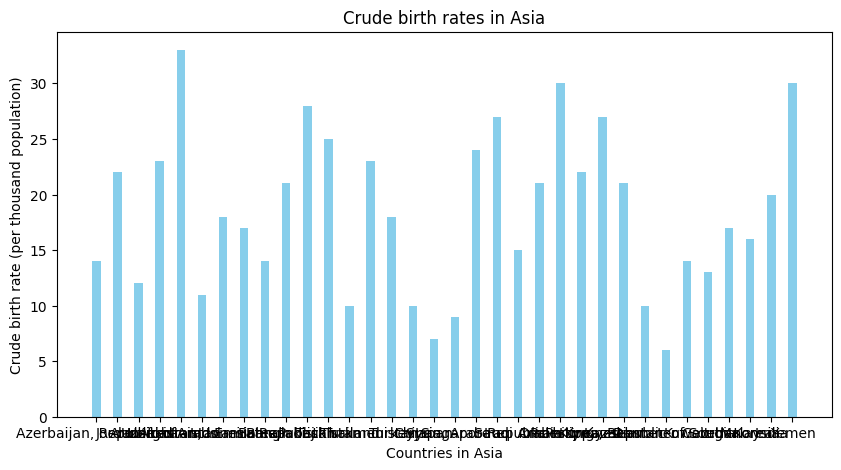

In [ ]:
## bar charts are one type of basic visualization you can create using matplotlib

# we created a separate dataframe for data from countries in Asia, so we will use this

# the 'x' value in this case would be what is on the x-axis: names of the different countries
bar_x_asia = asia_df['Country']

# the 'height' value in this case would be what influences the height of the bars: the crude birth rates of these countries
bar_y_asia = asia_df['Crude birth rate - per thousand population']
  
# now set the size you want your bar chart to be in inches
# in this case, we have the bar chart set to 10 by 5 inches
fig = plt.figure(figsize = (10, 5))
 
# this will actually create the bar chart itself with the data we want
# set this bar chart to what color you want the bar to be
# and the bar's width
plt.bar(bar_x_asia, bar_y_asia, color ='skyblue', width = 0.4)
 
# you can also set the chart title, along with the x and y-axis labels - this is generally good practice to describe what your chart is showing
plt.xlabel("Countries in Asia")
plt.ylabel("Crude birth rate (per thousand population)")
plt.title("Crude birth rates in Asia")
plt.show()

You may notice that the x-axis is quite unreadable - this is because there are too many countries displayed. We can fix this problem by adjusting the x-values to only include up to 5 or 10 countries, rather than every country in the 'Asia' region within this dataset. 

Let's adjust the x-values so that we see crude birth rates from Iran and neighboring countries: Iran, Azerbaijan, Armenia, Turkmenistan, Pakistan, Afghanistan, Oman, Turkey and Iraq. Note: in this dataset, Iran is listed as "Iran, Islamic Republic," and Azerbaijan is listed as "Azerbaijan, Republic of."

In [ ]:
# Let's re-create this bar chart, this time with data from these spsecific countries

# We can rename countries with longer names to one word for easier data analysis and visualization
asia_df = asia_df.replace({'Country':{"Iran, Islamic Republic":"Iran", "Azerbaijan, Republic of": "Azerbaijan"}})

# Assigning a new variable for the specific countries that will be shown on this bar chart
iran_neighbors = ["Iran", "Azerbaijan", "Armenia", "Turkmenistan", "Pakistan", "Afghanistan", "Oman", "Turkey", "Iraq"]

# Assigning a new variable to get the 'height' value, the crude birth rates of these countries
# for these specific countries
iran_neighbors_birth = asia_df[asia_df['Country'].isin(iran_neighbors)]['Crude birth rate - per thousand population']

Now that we have our data values needed for the bar chart, we can set the other details (i.e. dimensions, chart titles, axes labels) needed for the chart, and then actually call the bar chart.

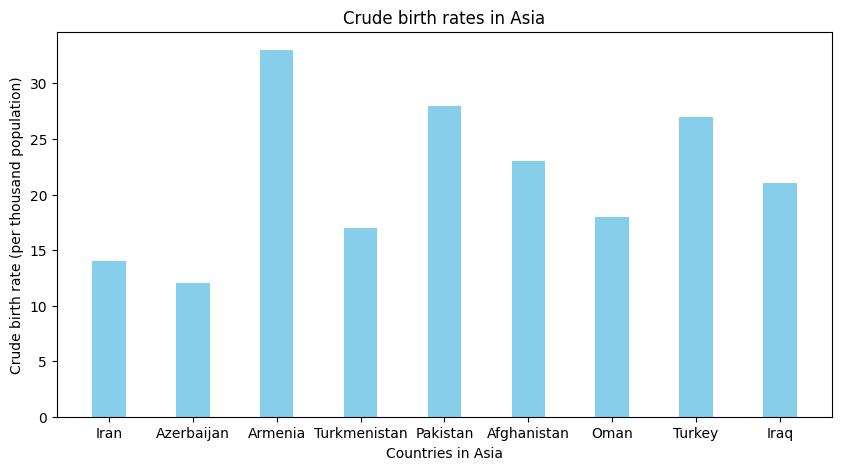

In [ ]:
# Setting the bar chart dimensions 
fig = plt.figure(figsize = (10, 5))
 
# Passing this data to the bar chart
plt.bar(iran_neighbors, iran_neighbors_birth, color ='skyblue', width = 0.4)
 
# Setting the chart title, along with the x and y-axis labels
plt.xlabel("Countries in Asia")
plt.ylabel("Crude birth rate (per thousand population)")
plt.title("Crude birth rates in Asia")
plt.show()

Bar charts like these are especially helpful for drawing general conclusions from datasets. From this bar chart, we can see that compared to its geographic neighbors, Iran had one of the *lowest* crude birth rates in 2020.

##### Making a scatterplot with matplotlib

`matplotlib` can also be used to make scatterplots. Scatterplots are generally used to compare two different *numeric** variables.

The general format of a matplotlib scatterplot is:
`plt.scatter(x, y)`, where matplotlib.pyplot is imported as `plt`. It takes x and y-values.

We can try making a scatterplot comparing the crude birth rates and death rates of Iran and its neighbors. 

In [ ]:
# the x-values will be iran_neighbors_birth, the variable we created for the bar chart
# that represents the crude birth rates from these same countries

# the y-values

iran_neighbors_death = asia_df[asia_df['Country'].isin(iran_neighbors)]['Crude death rate - per thousand population']
# check that this outputs as a series of values #iran_neighbors_child_mortality

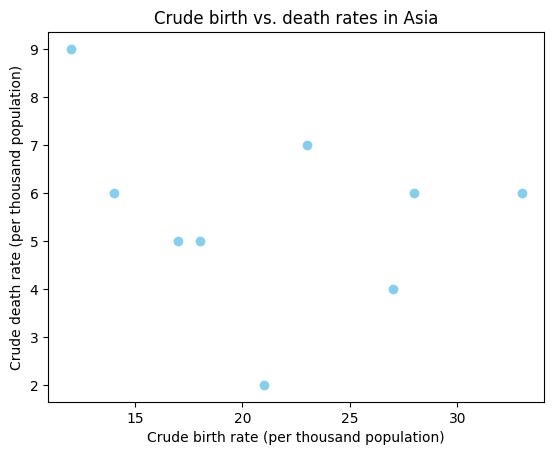

In [ ]:
# now that we have the specific data, let's plot these data points

# passing this data to the scatter plot
plt.scatter(iran_neighbors_birth, iran_neighbors_death, color='skyblue')
 
# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")
plt.show()

It's important to note the scale differences between axes when drawing conclusions from these charts. In this scatterplot, the scales on the x and y axes are different - the range of crude birth rates goes up past 30 while the range in crude death rates only goes up to 9. 

### Congrats on finishing your first lesson on basic chart creation! 

In the next lesson, we'll try adding text annotations to the scatterplot we made in this lesson. 

#### Additional resources



*   Using the pandas [rename()](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function

